# Numerical Simulation Laboratory                                                         
                                        Department of Physics, University of Milan(It)
                                        Spring 2020 
                                                                     Mattia Corigliano
## 1<sup>st </sup> Computational Exercise

## The Central Limit Theorem and Buffon's experiment

_In this first computational exercise we studied the validity of the central limit theorem and simulated the Buffon's estimate of pi._

_Before doing this, we began by checking the goodness of the Parallel Random Number Generator downloaded from the NSL website. We did this by generating 1mln random points and studying whether the sample estimates of the mean and variance converge to the exptected - population - values (large limit law).
The data-blocking technique was used to obtain reliable estimates of the errors.
We also performed a $\chi^2 $ test which confirmed the fairness of the PRNG._

_Then, we used the PRNG to study the CLT and simulate the Buffon's experiment. The validity of the CLT was addressed by studying the behaviour of the sample mean of N points sampled from three different distributions._


In [2]:
### importing useful libraries
import numpy as np
import matplotlib.pyplot as plt

##  setting the Layout
import matplotlib as mpl
## LINES
mpl.rcParams['lines.linewidth'] = 2
mpl.rcParams['lines.linestyle'] = '-'
## AXES
mpl.rcParams['axes.linewidth'] = 1 ## edge linewidth
mpl.rcParams['axes.grid'] = True ## display grid or not
mpl.rcParams['axes.titlesize'] = 16 ## fontsize of the axes title
#mpl.rcParams['axes.titleweight'] = 'bold'
mpl.rcParams['axes.labelsize'] = 14  ## fontsize of the x any y labels
mpl.rcParams['axes.formatter.limits'] = [-2,6] # use scientific notation if log10
mpl.rcParams['axes.formatter.use_mathtext'] = True # When True, use mathtext for scientific
mpl.rcParams['legend.fontsize'] = 12
## TICKS
mpl.rcParams['xtick.labelsize'] = 12 ## fontsize of the tick labels
mpl.rcParams['ytick.labelsize'] = 12 
mpl.rcParams['xtick.minor.visible'] = True ## visibility of minor ticks on x-axis
mpl.rcParams['ytick.minor.visible'] = True
## FIGURE
mpl.rcParams['figure.titleweight'] = 'bold' ## weight of the figure title
mpl.rcParams['figure.subplot.wspace'] = 0.4
mpl.rcParams['figure.subplot.hspace'] = 0.4
## ERRORBARS
mpl.rcParams['errorbar.capsize'] = 2  ## length of end cap on error bars in pixels

###   A. Check the goodness of the Pseudo-Random Number Generator 
    
by estimating:

- \begin{equation} \langle r \rangle = \int_0^1 r dr = 1/2 \end{equation}
    

- \begin{equation} \sigma^2 = \int_0^1 (r-1/2)^2 dr = 1/12 \end{equation}
    
and by performing the $\chi $-test.

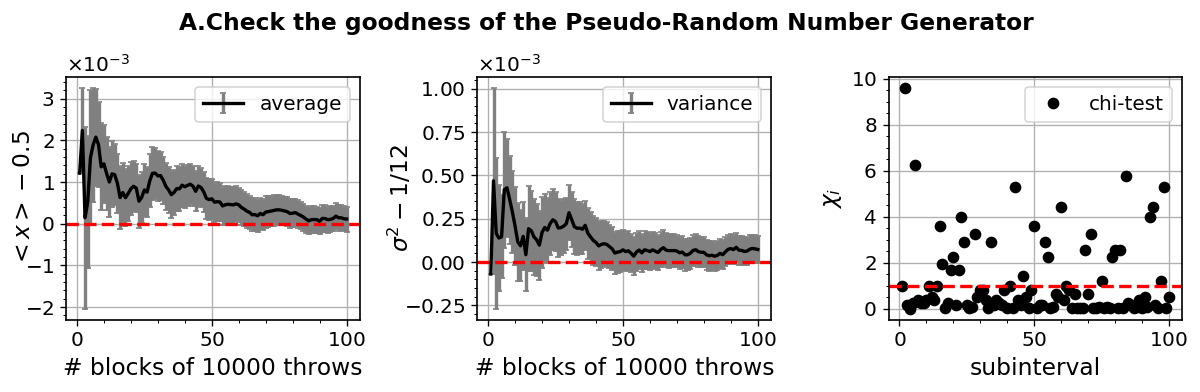

chi quadro =  115.91


In [11]:
plt.figure(figsize=(12, 3), dpi=120)
plt.suptitle('A.Check the goodness of the Pseudo-Random Number Generator', size=14)
mpl.rcParams['figure.subplot.top'] = 0.8

nplots = [1, 2, 3]
labels = ['average', 'variance', 'chi-test']
ylabels = ['$<x>-0.5$', '$\sigma^2-1/12$', '$\chi_i$']

for plot in nplots:
    data = np.loadtxt("data/output{}.txt".format(nplots[plot-1])).T
    block_length = int(data[0][0])
    if(plot == 1):
        data[1] = data[1] - 0.5
    elif(plot == 2):
        data[1] = data[1] - 1/12.
    plt.subplot(1, 3, plot);
    if(plot != 3):
        plt.errorbar(
            data[0]/block_length,
            data[1],
            yerr=data[2], 
            color = 'black',
            ecolor = 'grey', 
            label = labels[plot-1]
        )
        plt.axhline(0,ls = '--', color = 'red')
        plt.xlabel('# blocks of {} throws'.format(block_length))
        plt.ylabel(ylabels[plot-1], labelpad = -6)
        plt.legend()
    if(plot == 3):
        plt.plot(data[0],data[1], 'ok', label = labels[plot-1])
        plt.axhline(1,ls = '--', color = 'red')
        plt.xlabel('subinterval')
        plt.ylabel('$\chi_i$')
        plt.legend()
        
plt.show()
print("chi quadro = ", data[1].sum())

###  B. Extend the Pseudo-Random Number generator and check the Central Limit Theorem:

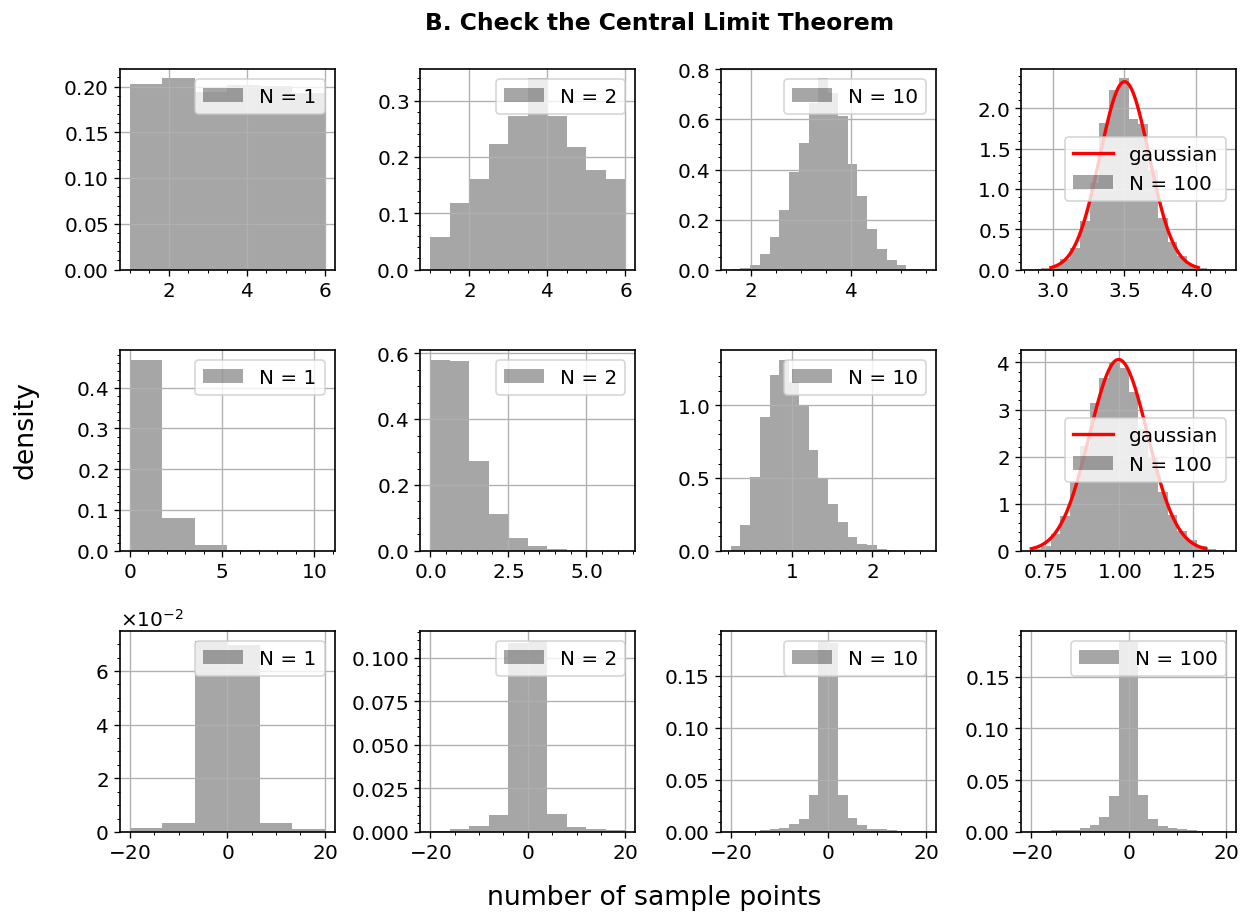

In [34]:
data = np.loadtxt("data/output4.txt").T

plt.figure(figsize=(12, 8), dpi=120)
plt.suptitle('B. Check the Central Limit Theorem', size=14)
mpl.rcParams['figure.subplot.top'] = 0.92

def Gaussian(x, mu, sigma):
    return np.power(2*np.pi*sigma**2, -0.5)*np.exp(-np.power(x-mu, 2)/2/np.power(sigma, 2))
mu = np.array([np.mean(data[3]), np.mean(data[7]), np.mean(data[11])])
sigma = np.array([np.std(data[3]), np.std(data[7]), np.std(data[11])])
x_mesh = np.array([np.linspace(mu[0]-3*sigma[0], mu[0]+3*sigma[0], 100), 
                   np.linspace(mu[1]-3*sigma[1], mu[1]+3*sigma[1], 100)])

labels = [1, 2, 10, 100]*4
bins = [6, 10, 20, 20]*4

for i in (np.arange(1, 13, 1)) :
    plt.subplot(3, 4, i); 
    if(i<=8):
        plt.hist(
            data[i-1], 
            bins =bins[i-1],
            color = "black",
            alpha = 0.35,
            density=True, 
            label = "N = {}".format(labels[i-1]))
    if(i>8):
        plt.hist(
            data[i-1],
            range=(-20,20),
            bins = bins[i-1],
            color = 'black',
            alpha=0.35,
            density = True,
            label = "N = {}".format(labels[i-1]))
    if(i==4):
        plt.plot(x_mesh[0], 
                 Gaussian(x_mesh[0], mu[0], sigma[0]),
                 color = 'red',
                 label = 'gaussian')
    if(i==8):
        plt.plot(x_mesh[1], 
                 Gaussian(x_mesh[1], mu[1], sigma[1]),
                 color = 'red',
                 label = 'gaussian')
    plt.legend()
    
fig = plt.gcf()
fig.text(0.05, 0.5, "density", size = 16, rotation="vertical")
fig.text(0.38, 0.05, "number of sample points", size = 16)
        
plt.show()

In the panel above is represented the behaviour of the sample mean as a function of the number of points for three different distributions: uniform (row 1), exponential (row 2) and cauchy-lorentz (row 3).

What we see in the panel agrees with the prediction of the central limit theorem:

- having finite mean and finite variance, the distribution of the sample mean of the first two distributions tends to the gaussian attractor in the space of distributions as the number of sample points grows.

- on the other hand, the distribution of the sample mean of the third distribution - having infinite variance -  is not expected to fall in the basin of attraction of the gaussian distribution (prediction of the CLT theorem). For such distributions, a two parameters family of limiting distributions was provided by Levy, and are called Levy-stable distributions.

In [29]:
print("mu +- 3\sigma of the sample mean:")
print("uniform: [", mu[0] - 3*sigma[0], " ", mu[0]+3*sigma[0])
print("exponential: [", mu[1] - 3*sigma[1], " ", mu[1]+3*sigma[1])
print("cauchy: [", mu[2] - 3*sigma[2], " ", mu[2]+3*sigma[2])

mu +- 3\sigma of the sample mean:
uniform: [ 2.987951987097679   4.01474401290232
exponential: [ 0.703355362623004   1.292341393576996
cauchy: [ -308.2698545600901   309.23002244943297


### C. Simulation of  Buffon’s experiment

In the final part of this computational exercise we simulated the Buffon's experiment.
We used the data-blocking technique to provide reliable estimates of the error in the measurements.

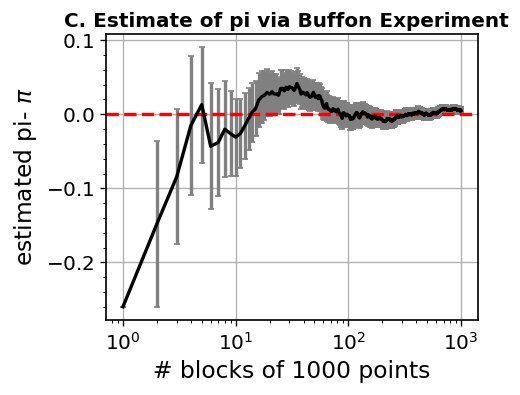

In [102]:
data5 = np.loadtxt("data/output5.txt").T

plt.figure(figsize=(4, 3), dpi=120)
plt.suptitle('C. Estimate of pi via Buffon Experiment', size=12)
mpl.rcParams['figure.subplot.top'] = 0.9
plt.errorbar(data5[0]/data5[0][0],data5[1]-np.pi,yerr=data5[2], color = 'black', ecolor = 'grey')
plt.axhline(0, ls = '--', color = 'red')
plt.xlabel('# blocks of {} points'.format(int(data5[0][0])))
plt.ylabel('estimated pi- $\pi$')       
plt.semilogx()
plt.show()

**NB**: This exercise showed that much care must be used in deciding the size of the blocks when performing data-blocking.

**NB**: In simulating the Buffon's estimate of pi it is important to sampling the inclination angle of the needle uniformly between $[0, \pi]$ (or in [0, $\pi/2$] depending on how one models the problem). However, this raises a problem as we do not want to use pi to estimate pi. Thus, we seek a way to sample uniformly the inclination angle withou using pi.

It is important to note that sampling uniformly the vertical projection of the needle from -L to L (if L is the size of the needle) does not solve the problem. Indeed, if $\theta$ is uniformly distributed in $[0, \pi]$ $y = L\cos \theta$ has the following distribution:

$$ p(y) \Delta y = \int_{y < f(\theta) < y + \Delta y} dx \ p(x) = \int dx \ p(x) \left[ \theta(y+\Delta y-f(\theta))-\theta(y-f(x)) \right] = \int dx \ p(x) \delta(y-f(x)) \Delta y
$$

and, using the property $\delta(y-f(x)) = \delta(y-x_0)/|f'(x_0)|$, with $x_0 = \arccos y/L$

\begin{align*} p(y)= \frac{1}{\pi L} \frac{1}{\sin{\arccos(\frac{y}{L})}}\end{align*}

Moreover, one cannot use inverse sampling at this point because in the function there is pi again!

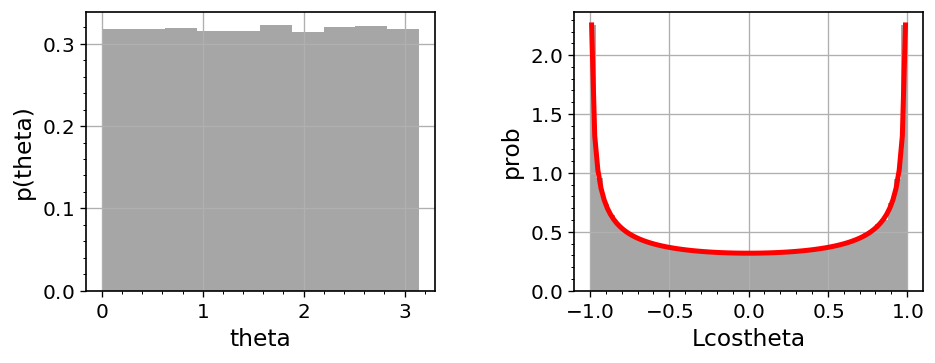

In [45]:
# It is important to note that theta uniform in 0, pi doesn't imply Lcostheta uniform in -L L

plt.figure(figsize=(9, 3), dpi=120)
mpl.rcParams['figure.subplot.top'] = 0.9

theta = np.random.uniform(0., np.pi, 100000)
x = np.linspace(-0.99, 0.99, num = 101)
L =np.cos(theta)

plt.subplot(1, 2, 1);
plt.hist(theta, density=True, color='black', alpha=0.35)
plt.xlabel('theta')
plt.ylabel("p(theta)")
plt.subplot(1, 2, 2);
plt.hist(L,bins = 50, density=True, color = 'black', alpha=0.35)
plt.xlabel("Lcostheta")
plt.ylabel("prob")
plt.plot(x, 1/(np.pi*1.)*1./np.sin(np.arccos(x)), "r-", lw =3 )
plt.show()



 We solved the problem sampling a random point inside the unit circle, and then taking the arcosine of its projection to the horizontal axis, i.e. inverting: 
 
$$ cos \theta = x/\sqrt{x^2+y^2} $$

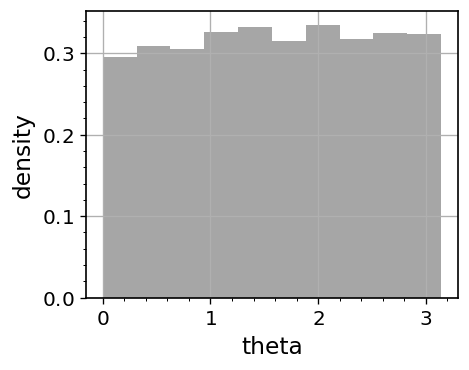

In [101]:
plt.figure(figsize=(4, 3), dpi=120)
flag = True
theta = np.zeros(10000)
for k in range(10000):
    while(flag == True):
        x = np.random.uniform(-1, 1)
        y = np.random.uniform(-1, 1)
        r = np.sqrt(x**2+y**2)
        if(r<1):
            theta[k]=np.arccos(x/r)
            break
plt.hist(theta, density = True, alpha=0.35, color = 'black')
plt.xlabel("theta")
plt.ylabel("density")
plt.show()